In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../data/Telco-Customer-Churn.csv')
df.head(50)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
#checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#all this for converting TotalCharges from object to float
#removing any spaces in the column valus
df.rename(columns=lambda x: x.strip(), inplace=True)

#checking for unexpected values or character
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert, setting errors as NaN
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


df['TotalCharges']=df['TotalCharges'].astype(float)

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
#summary for numeric values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [24]:
#checking for null after conversion
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
#removing columns based on cardinality 
feature_card=df.select_dtypes(include=['number']).nunique()
print(feature_card)

feature_card2=df.select_dtypes(include=['object']).nunique()
print(feature_card2)

SeniorCitizen        2
tenure              73
MonthlyCharges    1585
TotalCharges      6531
dtype: int64
customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64


In [42]:
df.drop(columns=['customerID'], inplace=True)

In [8]:
#checking for removed columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#changing our categorical column from int too object
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

In [14]:
#splitting data into categorical and numeric
Target_var= "Churn"
cat_var=['SeniorCitizen','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
num_var=['tenure','MonthlyCharges','TotalCharges']

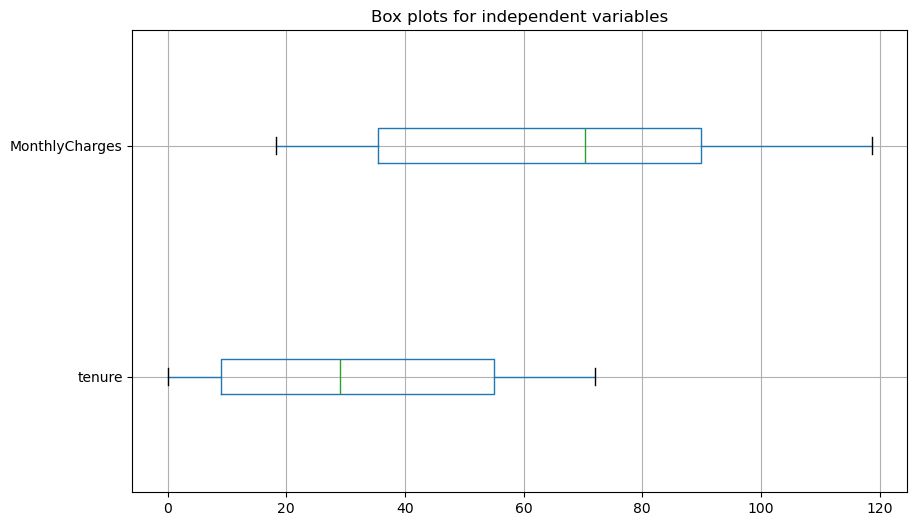

In [16]:
#boxplots for numeric columns 
fig, ax=plt.subplots(figsize=(10, 6))
boxplot= df[num_var].boxplot(vert=0, ax=ax)
_=ax.set_title("Box plots for independent variables")

In [18]:
Target_var= "Churn"
cate_var="SeniorCitizen"
inde_var=df.columns.drop(Target_var, cate_var).tolist()

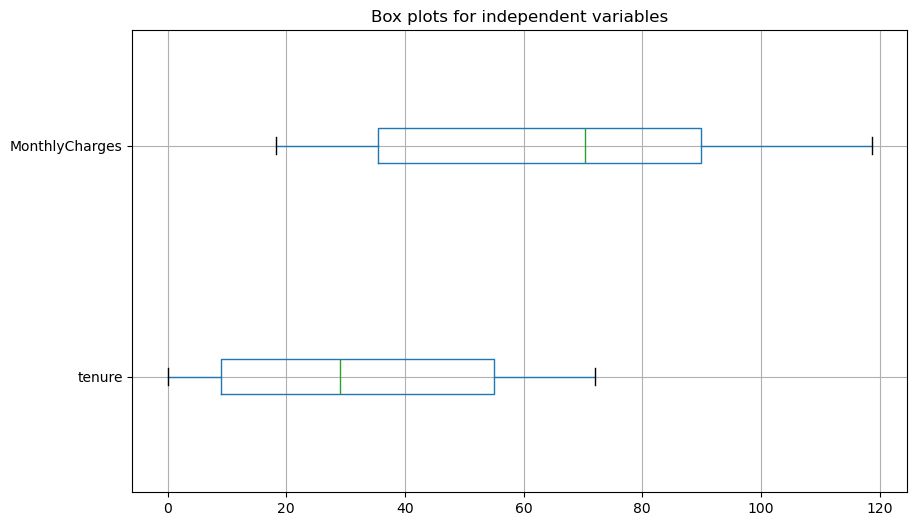

In [20]:
# Remove 'customerID' from inde_var if it exists
inde_var = [col for col in inde_var if col in df.columns]

# Filter numeric columns from inde_var
numeric_cols = df[inde_var].select_dtypes(include=['number']).columns

# Ensure numeric_cols is not empty
if len(numeric_cols) == 0:
	raise ValueError(f"No numeric columns found in inde_var: {inde_var}")

# Ensure numeric_cols contains at least one column
assert len(numeric_cols) > 0, f"Expected at least one numeric column, but found {len(numeric_cols)}"

# Boxplots for numeric columns
fig, ax = plt.subplots(figsize=(10, 6))
try:
	boxplot = df[numeric_cols].boxplot(vert=0, ax=ax)
	ax.set_title("Box plots for independent variables")
except Exception as e:
	print(f"Error while generating boxplots: {e}")

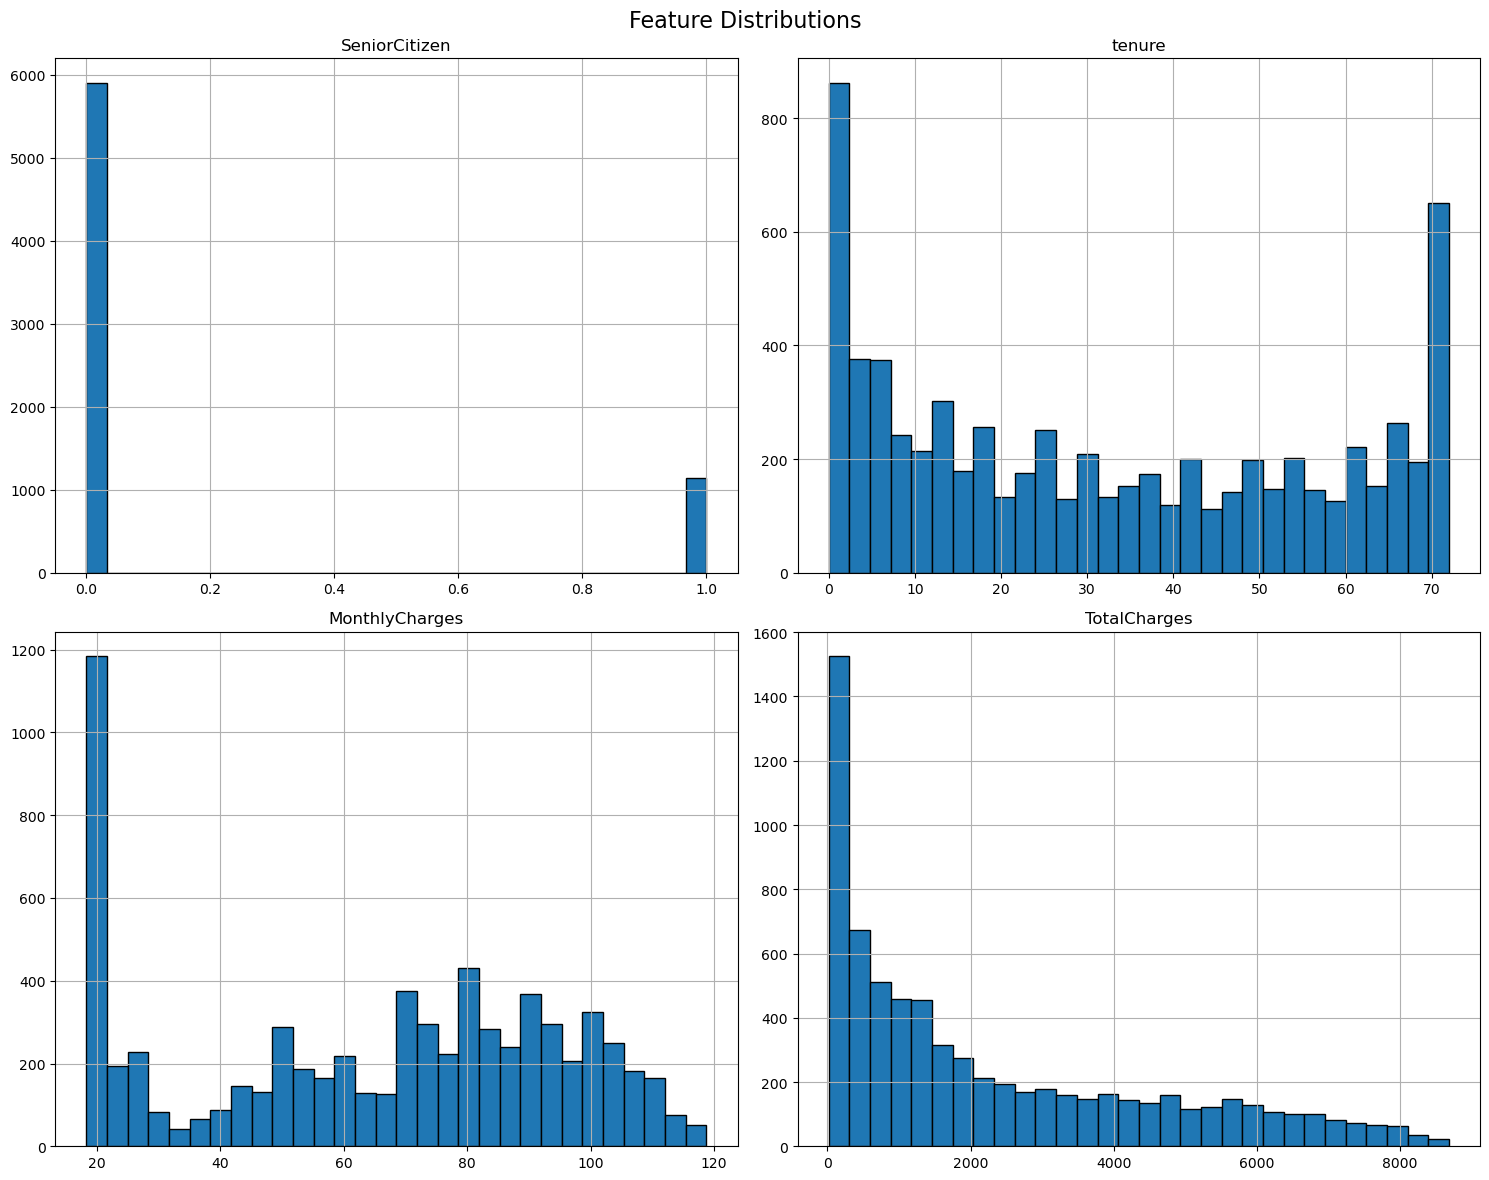

In [29]:
#histograms
df.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
for x in df.columns:
    sns.FacetGrid(df, aspect=1.2,).map(sns.histplot,x, bins=50, kde=True).add_legend()

In [ ]:
#hot-ecoding 
from category_encoders import OneHotEncoder

df1 = pd.DataFrame(df)
                    
#instanstiate the encoder
ohe=OneHotEncoder(use_cat_names= True, cols=['gender','SeniorCitizen','OnlineBackup','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

#transform data
df2=ohe.fit_transform(df1)

df2.info()

In [ ]:
#view encoded data
df2.head(50)

In [ ]:
#baivariante analysis
#correlation
df2.drop(columns=['Churn'], inplace=True)
df2.corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

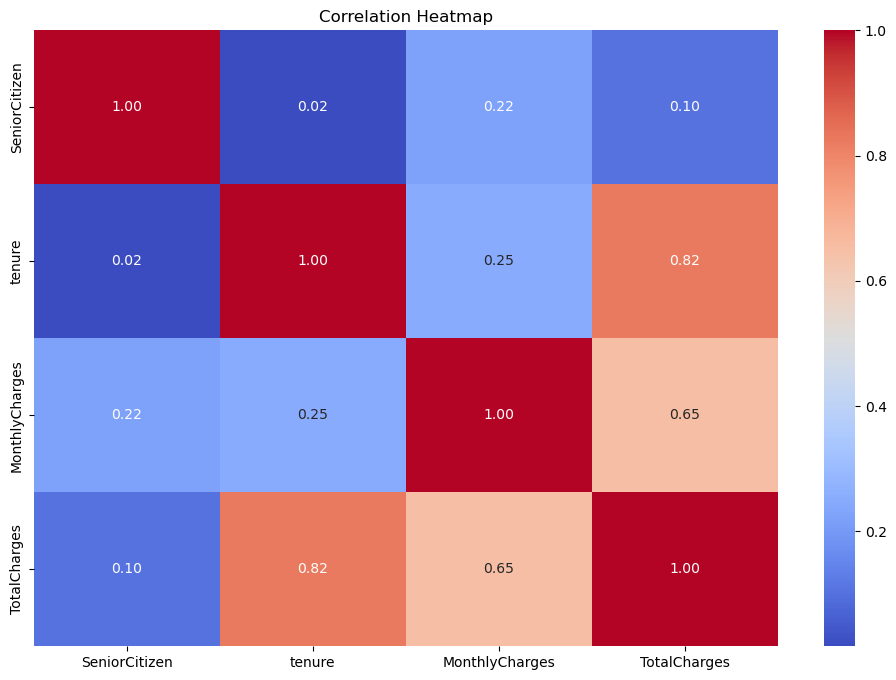

In [31]:
#correlation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

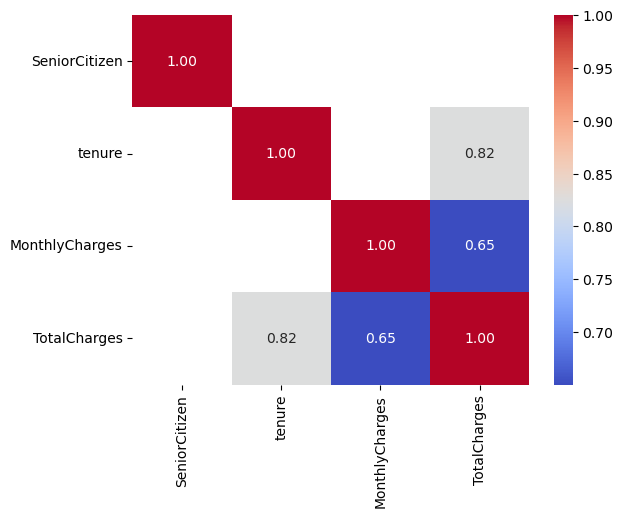

In [32]:
# Only show strong correlations (absolute value > 0.3 for example)
strong_corr = corr[(corr >= 0.3) | (corr <= -0.3)]
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', fmt='.2f')


In [33]:
services = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df['TotalServices'] = df[services].apply(lambda row: sum(row == 'Yes'), axis=1)
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[0, 12, 24, 48, 60, np.inf],
                           labels=['0-12', '12-24', '24-48', '48-60', '60+'])


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode target
y = df['Churn'].map({'Yes': 1, 'No': 0})
X = df.drop('Churn', axis=1)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Optional: XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

if xgb_available:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')



In [36]:
# Train and evaluate models
for name, model in models.items():
    print(f"\n=== {name} ===")
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print("F1 Score:", f1_score(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    except Exception as e:
        print(f"⚠️ Failed to run {name}: {e}")


=== Logistic Regression ===
Accuracy: 0.7955997161107168
Precision: 0.7374301675977654
Recall: 0.353887399463807
F1 Score: 0.4782608695652174
Confusion Matrix:
 [[989  47]
 [241 132]]

=== Random Forest ===
Accuracy: 0.7963094393186657
Precision: 0.6837606837606838
Recall: 0.4289544235924933
F1 Score: 0.5271828665568369
Confusion Matrix:
 [[962  74]
 [213 160]]

=== K-Nearest Neighbors ===
Accuracy: 0.7608232789212207
Precision: 0.5825688073394495
Recall: 0.34048257372654156
F1 Score: 0.42978003384094754
Confusion Matrix:
 [[945  91]
 [246 127]]

=== Gradient Boosting ===
Accuracy: 0.8140525195173882
Precision: 0.7047970479704797
Recall: 0.5120643431635389
F1 Score: 0.593167701863354
Confusion Matrix:
 [[956  80]
 [182 191]]

=== XGBoost ===


c:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:16:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.794889992902768
Precision: 0.6329113924050633
Recall: 0.5361930294906166
F1 Score: 0.5805515239477503
Confusion Matrix:
 [[920 116]
 [173 200]]


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the grid search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [38]:
# Best model and results
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
from sklearn.metrics import classification_report
y_pred_best = best_rf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.70      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
# Step 1: Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Step 2: Feature Encoding (One-hot encode categorical columns except the target variable 'Churn')
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 3: Feature Scaling (Standardize numerical columns)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Step 4: Split the data into features (X) and target (y)
X = df_encoded.drop('Churn_Yes', axis=1)  
y = df_encoded['Churn_Yes'] 

# Step 5: Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the first few rows of the preprocessed dataset
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalServices,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,TenureGroup_12-24,TenureGroup_24-48,TenureGroup_48-60,TenureGroup_60+
0,0,-1.277445,-1.160323,-0.994971,1,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,0,0.066327,-0.259629,-0.173876,3,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,0,-1.236724,-0.362660,-0.960399,3,False,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
3,0,0.514251,-0.746535,-0.195400,3,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,-1.236724,0.197365,-0.941193,1,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False


In [52]:
'''
X_train_subset, _, y_train_subset, _ = train_test_split(X, y, test_size=0.8, random_state=42)

from sklearn.linear_model import sklearn.linear_model LogisticRegression import

# Initialize LogisticRegression Logistic

# Regression Initialize model Logistic
logreg Regression = LogisticRegression(max_iter model=
logreg1000) =

# LogisticRegression(max_iter Train= models1000) on

# the smaller Train subset models
logreg.fit(X_train_subset, on y_train_subset) the
rf.fit(X_train_subset, smaller y_train_subset)
 subset
logreg.fit(X_train_subset, y_train_subset)
rf.fit(X_train_subset, y_train_subset)

# Make predictions
logreg_preds_subset = logreg.predict(X_test)
rf_preds_subset = rf.predict(X_test)

# Evaluate models
logreg_accuracy_subset = accuracy_score(y_test, logreg_preds_subset)
rf_accuracy_subset = accuracy_score(y_test, rf_preds_subset)

# Generate classification reports
logreg_report_subset = classification_report(y_test, logreg_preds_subset)
rf_report_subset = classification_report(y_test, rf_preds_subset)

logreg_accuracy_subset, rf_accuracy_subset, logreg_report_subset, rf_report_subset
'''


'\nX_train_subset, _, y_train_subset, _ = train_test_split(X, y, test_size=0.8, random_state=42)\n\nfrom sklearn.linear_model import sklearn.linear_model LogisticRegression import\n\n# Initialize LogisticRegression Logistic\n\n# Regression Initialize model Logistic\nlogreg Regression = LogisticRegression(max_iter model=\nlogreg1000) =\n\n# LogisticRegression(max_iter Train= models1000) on\n\n# the smaller Train subset models\nlogreg.fit(X_train_subset, on y_train_subset) the\nrf.fit(X_train_subset, smaller y_train_subset)\n subset\nlogreg.fit(X_train_subset, y_train_subset)\nrf.fit(X_train_subset, y_train_subset)\n\n# Make predictions\nlogreg_preds_subset = logreg.predict(X_test)\nrf_preds_subset = rf.predict(X_test)\n\n# Evaluate models\nlogreg_accuracy_subset = accuracy_score(y_test, logreg_preds_subset)\nrf_accuracy_subset = accuracy_score(y_test, rf_preds_subset)\n\n# Generate classification reports\nlogreg_report_subset = classification_report(y_test, logreg_preds_subset)\nrf_repo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('../data/Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
df_encoded = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Split the data into features (X) and target (y)
X = df_encoded.drop('Churn_Yes', axis=1)  
y = df_encoded['Churn_Yes'] 

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Logistic Regression
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
logreg_model = LogisticRegression(random_state=42)
logreg_search = RandomizedSearchCV(logreg_model, logreg_params, cv=5, n_iter=10, random_state=42, n_jobs=-1)

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_model = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf_model, rf_params, cv=5, n_iter=10, random_state=42, n_jobs=-1)

# Fit the models
logreg_search.fit(X_train, y_train)
rf_search.fit(X_train, y_train)

# Get best models
best_logreg = logreg_search.best_estimator_
best_rf = rf_search.best_estimator_

# Combine the models using VotingClassifier
voting_clf = VotingClassifier(estimators=[('logreg', best_logreg), ('rf', best_rf)], voting='hard')
voting_clf.fit(X_train, y_train)

# Make predictions with the Voting Classifier
voting_preds = voting_clf.predict(X_test)

# Evaluate the model
voting_accuracy = accuracy_score(y_test, voting_preds)
voting_report = classification_report(y_test, voting_preds)

# Print the results
print(f"Voting Classifier Accuracy: {voting_accuracy}")
print("Classification Report:\n", voting_report)


Voting Classifier Accuracy: 0.8076650106458482
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.94      0.88      1036
        True       0.73      0.44      0.55       373

    accuracy                           0.81      1409
   macro avg       0.78      0.69      0.71      1409
weighted avg       0.80      0.81      0.79      1409



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with RandomForest and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best model after grid search
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
rf_preds = best_rf.predict(X_test)

# Generate classification report
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds)

print(f"Best Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Classification Report:\n{rf_report}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Random Forest Accuracy: 0.7991483321504613
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.93      0.87      1036
        True       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409

